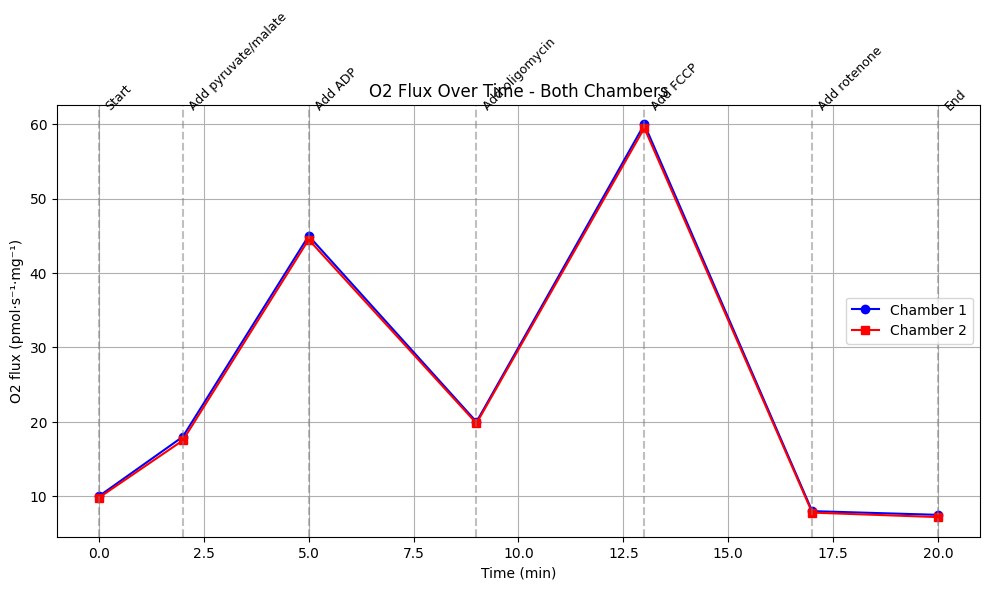

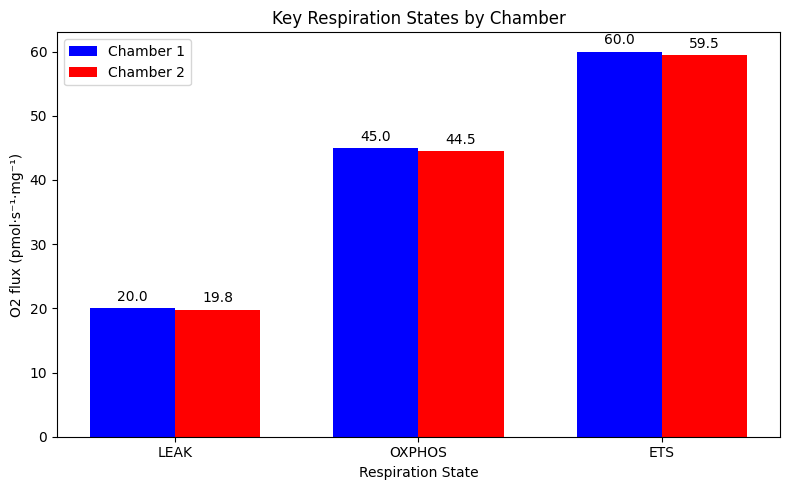

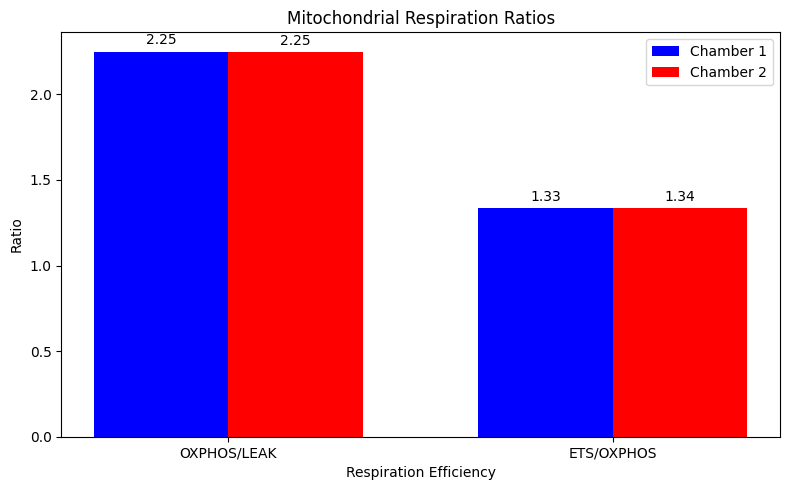

In [2]:
import sys
import os

# Add the parent folder (o2kworkflow) to sys.path
sys.path.append(os.path.abspath("../"))
from src.parser import load_csv, get_state_flux, compute_ratios, plot_flux, plot_bar, plot_ratios

# Load CSV
df = load_csv("../data/o2k_sample_export.csv")

# Plot flux over time
plot_flux(df)

# Get key respiration states
summary = get_state_flux(df)

# Plot bar graph of states
plot_bar(summary)

# Compute ratios
efficiency = compute_ratios(summary)

# Plot ratios
plot_ratios(efficiency)


In [3]:
import os

output_folder = "../results"
os.makedirs(output_folder, exist_ok=True)


In [4]:
import glob
import pandas as pd
from src.parser import load_csv, summarize_replicates, plot_bar_with_error_save

# Get all CSV files in data folder
csv_files = glob.glob("../data/*.csv")
print(f"Found {len(csv_files)} CSV files.")

for f in csv_files:
    # Load CSV
    df = load_csv(f)
    
    # Extract experiment name from filename
    exp_name = os.path.basename(f).replace(".csv", "")
    
    # Summarize replicates for this file
    summary_stats = summarize_replicates(df)
    
    # ---- Save bar graph for this experiment ----
    bar_filename = os.path.join(output_folder, f"{exp_name}_bar_graph.png")
    plot_bar_with_error_save(summary_stats, bar_filename)
    
    # ---- Save summary table for this experiment ----
    summary_df = pd.DataFrame({
        "Chamber": [],
        "State": [],
        "Mean": [],
        "SD": []
    })
    
    for ch in summary_stats:
        for i, state in enumerate(summary_stats[ch]["State"]):
            summary_df = pd.concat([summary_df, pd.DataFrame({
                "Chamber":[ch],
                "State":[state],
                "Mean":[summary_stats[ch]["Mean"][i]],
                "SD":[summary_stats[ch]["Std"][i]]
            })], ignore_index=True)
    
    csv_filename = os.path.join(output_folder, f"{exp_name}_summary.csv")
    summary_df.to_csv(csv_filename, index=False)
    
    print(f"Saved outputs for {exp_name}:")
    print(f" - Bar graph: {bar_filename}")
    print(f" - Summary CSV: {csv_filename}")


Found 1 CSV files.
Saved outputs for o2k_sample_export:
 - Bar graph: ../results/o2k_sample_export_bar_graph.png
 - Summary CSV: ../results/o2k_sample_export_summary.csv
